#**Classificação: Resolvendo problemas multiclasse**

##**Aula 1 - Conhecendo os dados**

###**Carregando os dados**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/dados_estudantes.csv')

In [3]:
df.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

###**Entendendo os dados**

In [5]:
df['Target'].unique()

array(['Desistente', 'Graduado', 'Matriculado'], dtype=object)

In [20]:
df.nunique()

Estado civil                                  6
Migração                                      2
Sexo                                          2
Idade na matrícula                           46
Estrangeiro                                   2
Necessidades educacionais especiais           2
Devedor                                       2
Taxas de matrícula em dia                     2
Bolsista                                      2
Taxa de desemprego                           10
Taxa de inflação                              9
PIB                                          10
Curso                                        17
Período                                       2
Qualificação prévia                          17
disciplinas 1º semestre (creditadas)         21
disciplinas 1º semestre (matriculadas)       23
disciplinas 1º semestre (avaliações)         35
disciplinas 1º semestre (aprovadas)          23
disciplinas 1º semestre (notas)             805
disciplinas 1º semestre (sem avaliações)

##**Aula 2 - Explorando os dados**

###**Dados demográficos**

* Estado civil
* Migração
* Sexo
* Idade na inscrição
* Estrangeiro

In [6]:
df['Estado civil'].value_counts(normalize = True)*100

Estado civil
Solteiro               88.584991
Casado                  8.566908
Divorciado              2.056962
União Estável           0.565099
Legalmente Separado     0.135624
Viúvo                   0.090416
Name: proportion, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

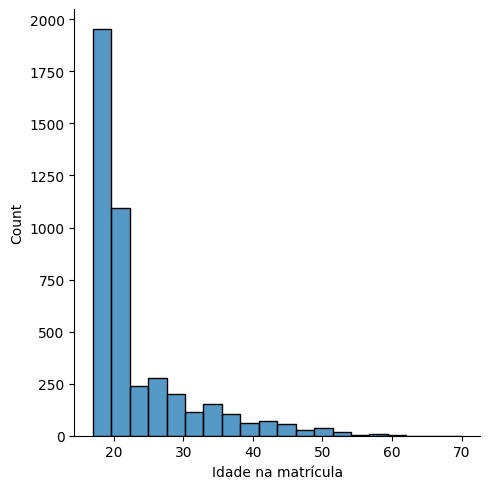

In [8]:
sns.displot(df['Idade na matrícula'], bins=20)
plt.show()

In [9]:
color_dict = {'Desistente': '#e34c42','Graduado': '#4dc471', 'Matriculado': '#3b71db'}

# Definindo a paleta de cores
sns.set_palette(list(color_dict.values()))

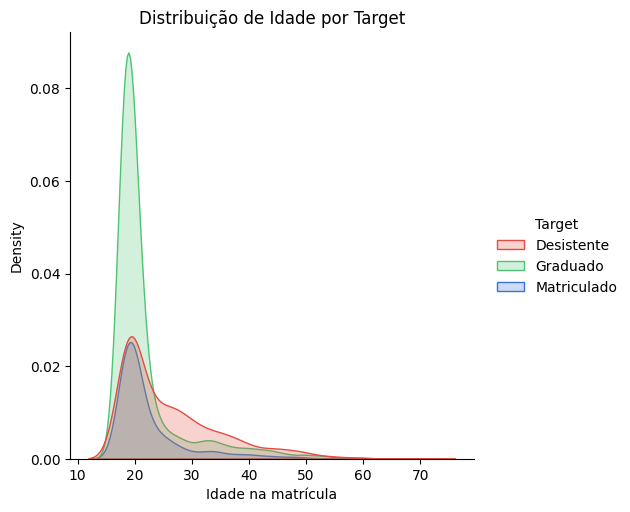

In [10]:
sns.displot(data=df, x='Idade na matrícula', hue='Target', kind='kde', fill=True)
plt.title('Distribuição de Idade por Target')
plt.show()

In [11]:
df['Estrangeiro'].value_counts(normalize = True)*100

Estrangeiro
Não    97.513562
Sim     2.486438
Name: proportion, dtype: float64

In [12]:
df['Sexo'].value_counts(normalize = True)*100

Sexo
Feminino     64.82821
Masculino    35.17179
Name: proportion, dtype: float64

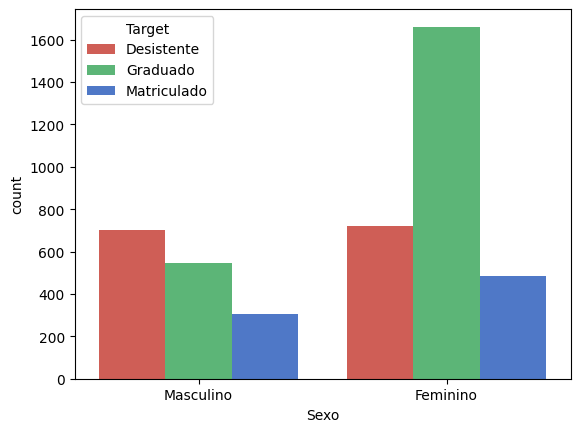

In [13]:
sns.countplot(x='Sexo', hue='Target', data=df)
plt.show()

###**Dados socioeconômicos e macroeconômicos**

**Socioeconômicos**
* Necessidades educacionais especiais
* Devedor
* Taxas de matrícula em dia
* Bolsista

**Macroeconômicos**
* Taxa de desemprego
* Taxa de inflação
* PIB

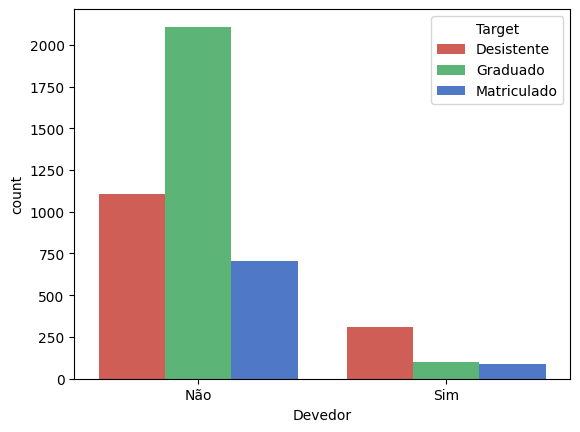

In [14]:
sns.countplot(x='Devedor', hue='Target', data=df)
plt.show()

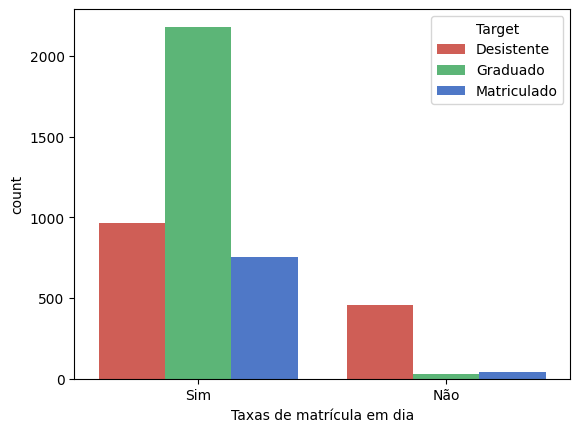

In [15]:
sns.countplot(x='Taxas de matrícula em dia', hue='Target', data=df)
plt.show()

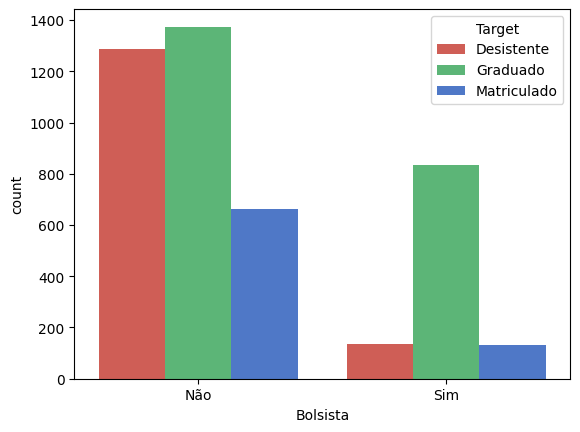

In [16]:
sns.countplot(x='Bolsista', hue='Target', data=df)
plt.show()

###**Dados no momento da matrícula**

* Curso
* Período
* Qualificação prévia

In [17]:
import plotly.express as px

In [18]:
# Calcula as contagens das combinações Curso-Target
contagem = df.groupby(["Curso", "Target"]).size().reset_index(name="Contagem")

# Calcula as porcentagens
contagem['Porcentagem'] = contagem.groupby("Curso")["Contagem"].transform(lambda x: (x / x.sum()) * 100)

# Cria o gráfico interativo
fig = px.bar(contagem, y='Curso', x='Porcentagem', color='Target', orientation='h',
             color_discrete_map={'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'})

# Mostra o gráfico
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

###**Dados acadêmicos**

* disciplinas creditadas
* disciplinas matriculadas
* disciplinas avaliações
* disciplinas aprovadas
* disciplinas notas
* disciplinas sem avaliações
* disciplinas faltas

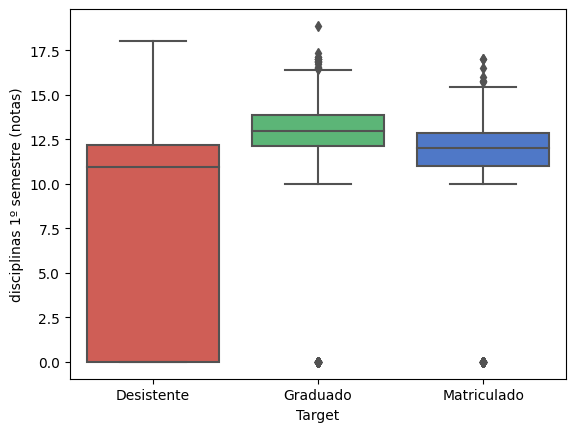

In [ ]:
sns.boxplot(x='Target', y='disciplinas 1º semestre (notas)', data=df)
plt.show()

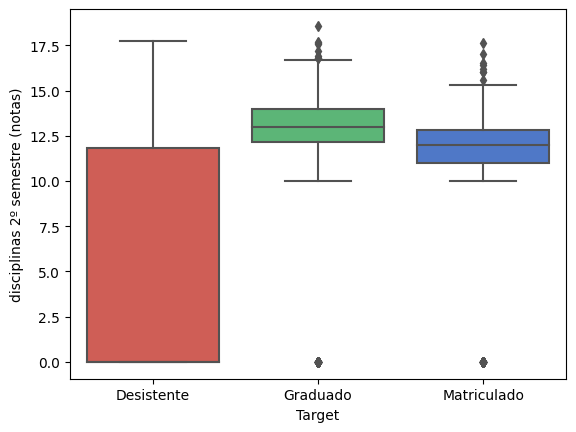

In [ ]:
sns.boxplot(x='Target', y='disciplinas 2º semestre (notas)', data=df)
plt.show()

In [ ]:
df['Target'].value_counts(normalize = True)*100

Graduado       49.932188
Desistente     32.120253
Matriculado    17.947559
Name: Target, dtype: float64